In [1]:
# 数字の画像のデータセットを使うためにMNISTをimportする

import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers
from keras.datasets import mnist

In [3]:
# 教師データとテストデータを用意
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

CNNのmodelを作成

In [5]:
model = keras.Sequential()

# 2次元の入力を長さ784の1次元配列に変換（次元削減）
model.add(layers.Flatten(input_shape=(28, 28)))

# 28*28を14*14に圧縮
model.add(layers.Dense(128, activation='relu'))

# 数値なので出力は10種類
model.add(layers.Dense(10, activation='softmax'))

modelの情報を表示

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

学習

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9265 - loss: 0.2552 - val_accuracy: 0.9609 - val_loss: 0.1329
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9664 - loss: 0.1142 - val_accuracy: 0.9676 - val_loss: 0.1031
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9764 - loss: 0.0786 - val_accuracy: 0.9737 - val_loss: 0.0873
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9819 - loss: 0.0593 - val_accuracy: 0.9745 - val_loss: 0.0803
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9858 - loss: 0.0453 - val_accuracy: 0.9748 - val_loss: 0.0811
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9889 - loss: 0.0356 - val_accuracy: 0.9788 - val_loss: 0.0707
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9911 - loss: 0.0277 - val_accuracy: 0.9782 - val_loss: 0.0729
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9931 - loss: 0.0228 -

テスト①

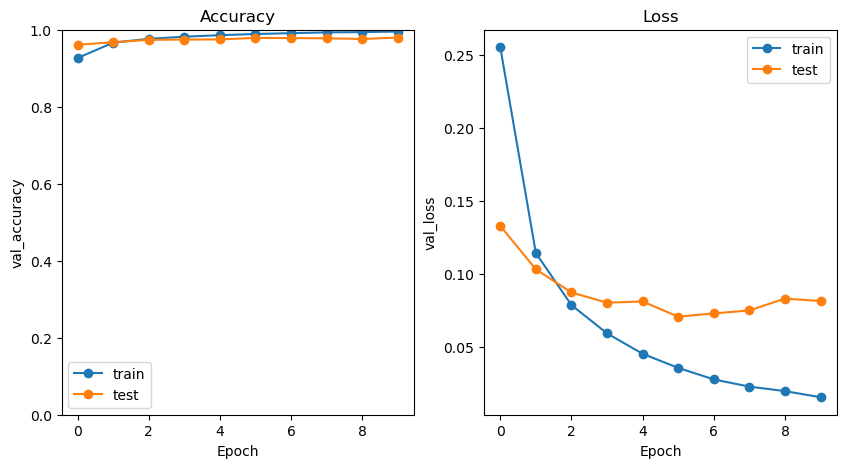

In [8]:
param =[["Accuracy", "accuracy", "val_accuracy"],["Loss", "loss", "val_loss"]]

plt.figure(figsize=(10, 5))
for i in range(2):
  plt.subplot(1, 2, i + 1)
  plt.title(f"{param[i][0]}")
  plt.xlabel("Epoch")
  plt.ylabel(param[i][2])
  plt.plot(history.history[param[i][1]], "o-")
  plt.plot(history.history[param[i][2]], "o-")
  plt.legend(["train", "test"])
  if i == 0:
    plt.ylim([0, 1])
plt.show()

テスト②

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


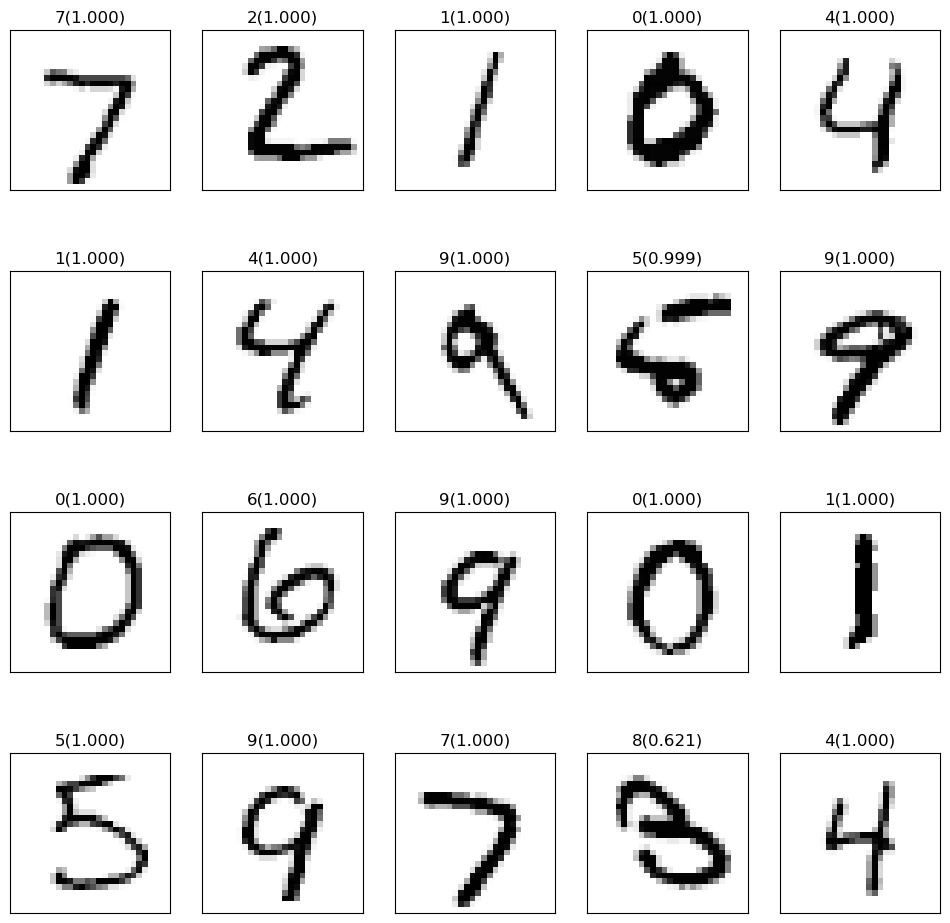

In [15]:
pre = model.predict(x_test)

fig = plt.figure(figsize=(12, 12))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap='Grays')
    index = np.argmax(pre[i])
    plt.title(f"{index}({pre[i][index]:.3f})")
plt.show()